<a href="https://colab.research.google.com/github/iqbalhanif/Intro-R/blob/main/Machine_Learning_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
##mount google drive agar bisa connect
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
##cara agar bisa menggunakan R di colab
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
##install & load package
%%R
install.packages('e1071')
install.packages('caret')
install.packages('ROCR')
install.packages('magrittr')
library('magrittr')
library('ROCR')
library('caret')
library('e1071')

# 1. Data Load & Preparation

In [43]:
## load data
%%R
df = read.csv("/content/drive/MyDrive/Spatial Machine Learning R/Train_M12_Cap_sample.csv")
names(df)[names(df) == "X"] <- "id"
head(df)

       id  INT_PAY_M1 INT_REV_INT_MAX6 INT_PAY_DECR INT_DWNL_DECR ALL_MTTR_M2
1 1208886  0.50848288        1.0929953   1.06816300     0.4727832 -0.24809795
2  723308  0.52003615        0.1382875   0.01694198    -0.6271871  0.01355142
3 1662756  0.06710127       -0.4113927   0.01694198     0.4727832 -0.24809795
4 1342562  0.96333515        0.1382875   0.01694198     0.4727832 -0.24809795
5 1199474  2.24522119        0.5722456  -2.08550006     0.4727832 -0.24809795
6  628824 -0.54233777       -0.4229649   1.06816300    -0.6271871 -0.24809795
  INT_MTTR_M6 ALL_MTTR_DECR ALL_TRB_M6         LOS   DIVRE_ID Y_CHURN
1  -0.1776396      1.128172 -0.3242635 -0.04217193  1.2783019       0
2  -0.1776396      1.128172 -0.3242635 -0.23772230 -0.2879083       0
3  -0.1776396      1.128172 -0.3242635 -0.46586440  1.2783019       0
4  -0.1776396     -0.921616 -0.3242635 -0.72659823 -1.3320484       0
5  -0.1776396      1.128172 -0.3242635 -0.85696514 -0.8099783       0
6  -0.1776396     -0.921616 -0.324

In [52]:
## Train-tes split dengan proporsi 70%-30%
%%R
N_FILES=dim(df)[1]
SPLT=0.7 #70% train
b = floor(SPLT*N_FILES)
train = df[1:b,]
test = df[(b+1):N_FILES,]
cat("train = ", dim(train), "\n")
cat("test = ", dim(test), "\n")

train =  7000 12 
test =  3000 12 


# 2. Modeling & Evaluate

In [53]:
## modeling with train data
%%R
logistic <- glm(Y_CHURN~. - id, data=train, family="binomial")
summary(logistic)


Call:
glm(formula = Y_CHURN ~ . - id, family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0104  -0.3690  -0.3117  -0.2475   3.3165  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -3.00611    0.06042 -49.756  < 2e-16 ***
INT_PAY_M1       -0.61753    0.06721  -9.189  < 2e-16 ***
INT_REV_INT_MAX6  0.21727    0.06000   3.621 0.000294 ***
INT_PAY_DECR      0.03060    0.05063   0.604 0.545584    
INT_DWNL_DECR     0.18031    0.05291   3.408 0.000655 ***
ALL_MTTR_M2       0.05736    0.04886   1.174 0.240414    
INT_MTTR_M6       0.00998    0.05933   0.168 0.866404    
ALL_MTTR_DECR    -0.07502    0.06059  -1.238 0.215628    
ALL_TRB_M6        0.08204    0.06572   1.248 0.211931    
LOS              -0.30390    0.06151  -4.941 7.78e-07 ***
DIVRE_ID         -0.09424    0.05633  -1.673 0.094313 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomia

In [54]:
## evaluate with test data
%%R
predicted <- ifelse(predict(logistic,type=c("response"),test)>0.5, 1, 0)
actual <- as.factor(test$Y_CHURN)
conf_matrix <- confusionMatrix(as.factor(predicted), actual)
conf_matrix

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2847  153
         1    0    0
                                          
               Accuracy : 0.949           
                 95% CI : (0.9405, 0.9566)
    No Information Rate : 0.949           
    P-Value [Acc > NIR] : 0.5215          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 1.000           
            Specificity : 0.000           
         Pos Pred Value : 0.949           
         Neg Pred Value :   NaN           
             Prevalence : 0.949           
         Detection Rate : 0.949           
   Detection Prevalence : 1.000           
      Balanced Accuracy : 0.500           
                                          
       'Positive' Class : 0               
                        

[1] "AUC"
[[1]]
[1] 0.6279664



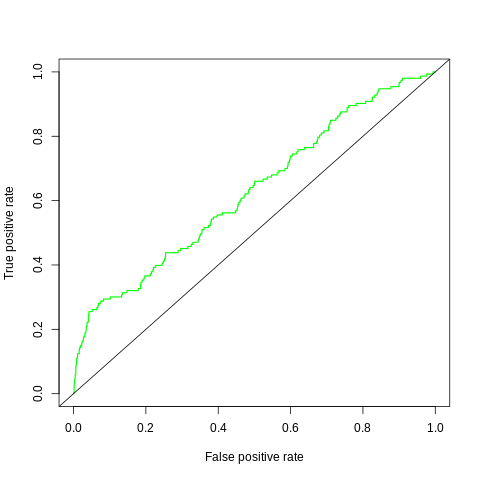

In [67]:
## AUC and ROC plot
%%R
plogistic <- predict(logistic,type=c("response"),test)
pred <- prediction(plogistic, test$Y_CHURN)

auc <- performance(pred, measure = "auc")
print("AUC")
print(auc@"y.values")

perf <- performance(pred, "tpr","fpr")
plot(perf, col = "green", lwd = 1.5)
abline(a=0, b= 1)

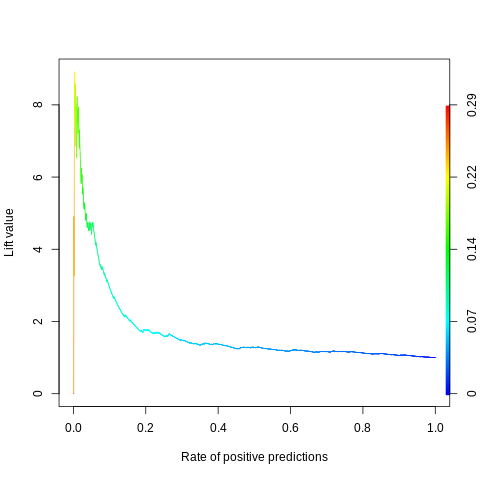

In [68]:
## plot lift chart
%%R
plot(performance(pred, measure="lift", x.measure="rpp"), colorize=TRUE)

# 3. Finding The Best Cut Off/Threshold

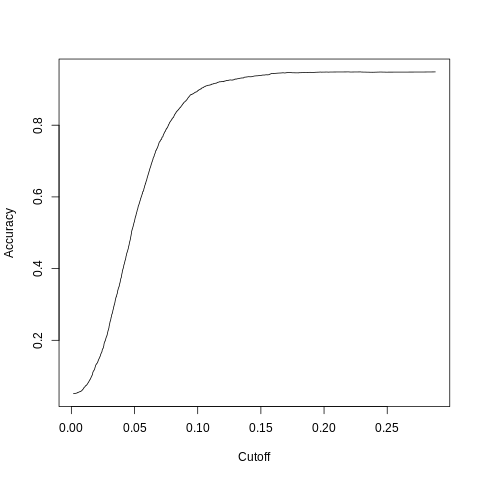

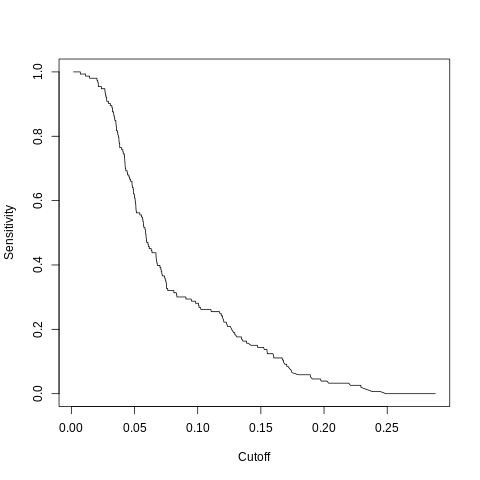

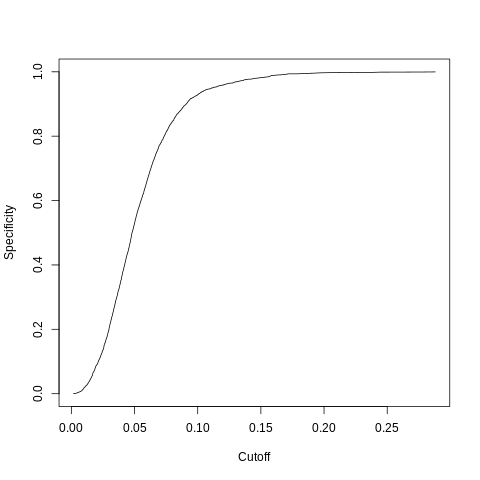

In [69]:
## Finding best cut off / threshold through graph
%%R
acc.perf <- performance(pred, "acc")
sens.perf <- performance(pred, "sens")
spec.perf <- performance(pred, "spec")
plot(acc.perf)
plot(sens.perf)
plot(spec.perf)
ind = which.max( slot(acc.perf, "y.values")[[1]])
acc = slot(acc.perf, "y.values")[[1]][ind]
cutoff = slot(acc.perf, "x.values")[[1]][ind]

In [70]:
## Finding best cut off / threshold through table
%%R
ndf <- data.frame()

for(i in 1:100) {
  threshold <- i/100
  predicted <- ifelse(predict(logistic,type=c("response"),df)>threshold, 1, 0)
  actual <- as.factor(df$Y_CHURN)
  conf_matrix <- confusionMatrix(as.factor(predicted), actual)
#  print(conf_matrix$overall)
  cdf <- cbind(threshold, t(conf_matrix$overall["Accuracy"]),
               t(conf_matrix$byClass[c("Sensitivity", "Specificity")]),
               conf_matrix$table[2,2], conf_matrix$table[1,1], 
               conf_matrix$table[2,1], conf_matrix$table[1,2]
              )
  ndf <- rbind(ndf, cdf)
  
}
colnames(ndf) <- c("threshold", "accuracy", "sensitivity", "specificity",
                   "tp", "tn", "fp", "fn")
ndf

    threshold accuracy sensitivity specificity  tp   tn   fp  fn
1        0.01   0.0708  0.01797610 0.990791897 538  170 9287   5
2        0.02   0.1306  0.08269007 0.965009208 524  782 8675  19
3        0.03   0.2409  0.20312996 0.898710866 488 1921 7536  55
4        0.04   0.3825  0.35941631 0.784530387 426 3399 6058 117
5        0.05   0.5240  0.51686581 0.648250460 352 4888 4569 191
6        0.06   0.6573  0.66596172 0.506445672 275 6298 3159 268
7        0.07   0.7567  0.77646188 0.412523020 224 7343 2114 319
8        0.08   0.8233  0.85069261 0.346224678 188 8045 1412 355
9        0.09   0.8636  0.89626732 0.294659300 160 8476  981 383
10       0.10   0.8909  0.92672095 0.267034991 145 8764  693 398
11       0.11   0.9080  0.94596595 0.246777164 134 8946  511 409
12       0.12   0.9181  0.95823200 0.219152855 119 9062  395 424
13       0.13   0.9256  0.96806598 0.186003683 101 9155  302 442
14       0.14   0.9320  0.97631384 0.160220994  87 9233  224 456
15       0.15   0.9364  0